# Boilerplate Page View Time Series Visualiser🔭

## Call in the libraries

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

## Data Frame


Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.


In [40]:
# calling in the dataset. 
df = pd.read_csv('../data/fcc-forum-pageviews.csv')

In [41]:
df['date'] = pd.to_datetime(df['date'])

In [42]:
df = df.set_index('date')

In [43]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


## Clean Data 

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [44]:
    # Calculate the lower and upper thresholds for filtering
    lower_threshold = df['value'].quantile(0.025)
    upper_threshold = df['value'].quantile(0.975)
    
    # Filter out days with views below the lower threshold or above the upper threshold
    cleaned_df = df[(df['value'] >= lower_threshold) & (df['value'] <= upper_threshold)]

In [45]:
cleaned_df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## Plot 

### Line Plot


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

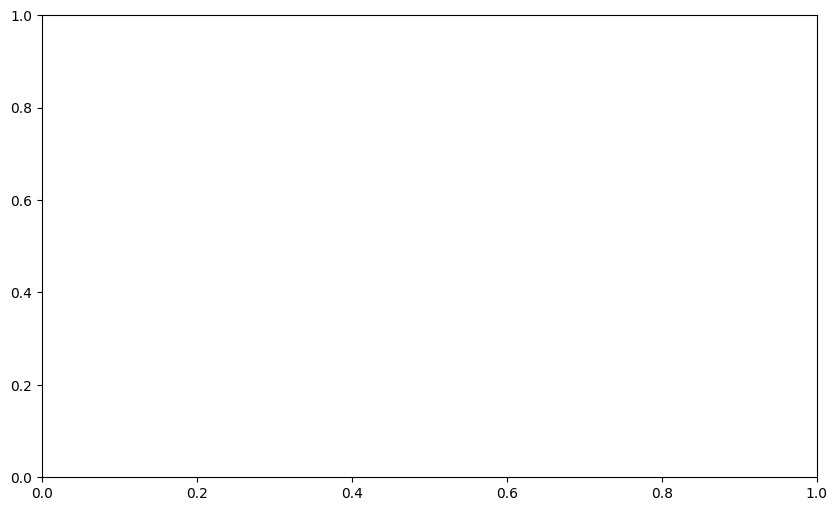

In [46]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(10, 6))


In [47]:
# Plot the line chart
ax.lineplot(df.index, df['value'], color='r', linewidth=1)



AttributeError: 'AxesSubplot' object has no attribute 'lineplot'

In [ ]:
# Set title and labels
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")



In [ ]:
# Display the plot
plt.show();

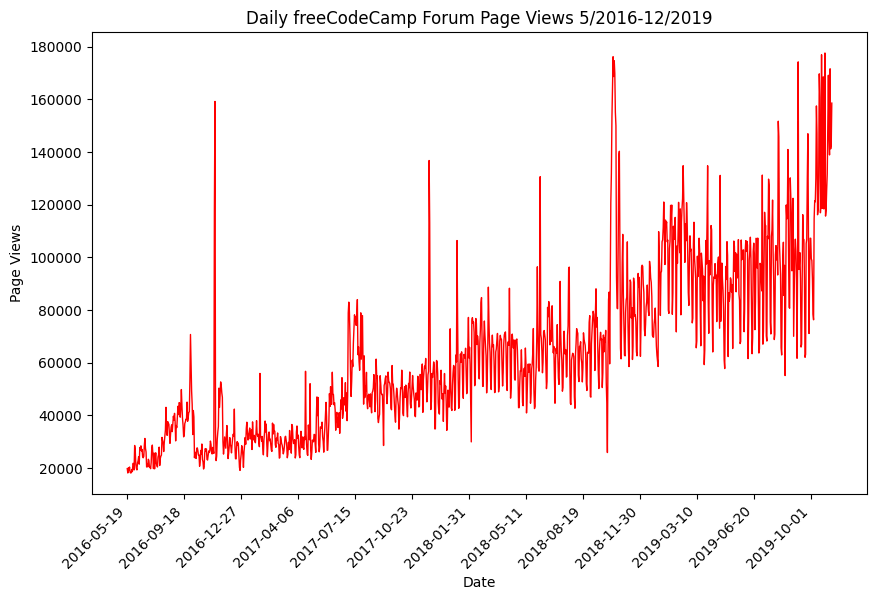

In [ ]:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(cleaned_df.index, cleaned_df['value'], color='r', linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    # Rotate x-axis tick labels and display every nth label
    n = 100  # Adjust this value based on your data and plot size
    plt.xticks(rotation=45, ha='right')  # Rotate and align labels
    plt.xticks(range(0, len(cleaned_df.index), n), cleaned_df.index[::n])  # Display every nth label
    
    plt.show()


### Bar Plot

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [ ]:
cleaned_df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [ ]:
cleaned_df.dtypes

value    int64
dtype: object

/var/folders/r7/fqzyybzs3jsbcybvv87922_w0000gn/T/ipykernel_10263/4065081650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Year'] = cleaned_df.index.year
/var/folders/r7/fqzyybzs3jsbcybvv87922_w0000gn/T/ipykernel_10263/4065081650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Month'] = cleaned_df.index.month_name()


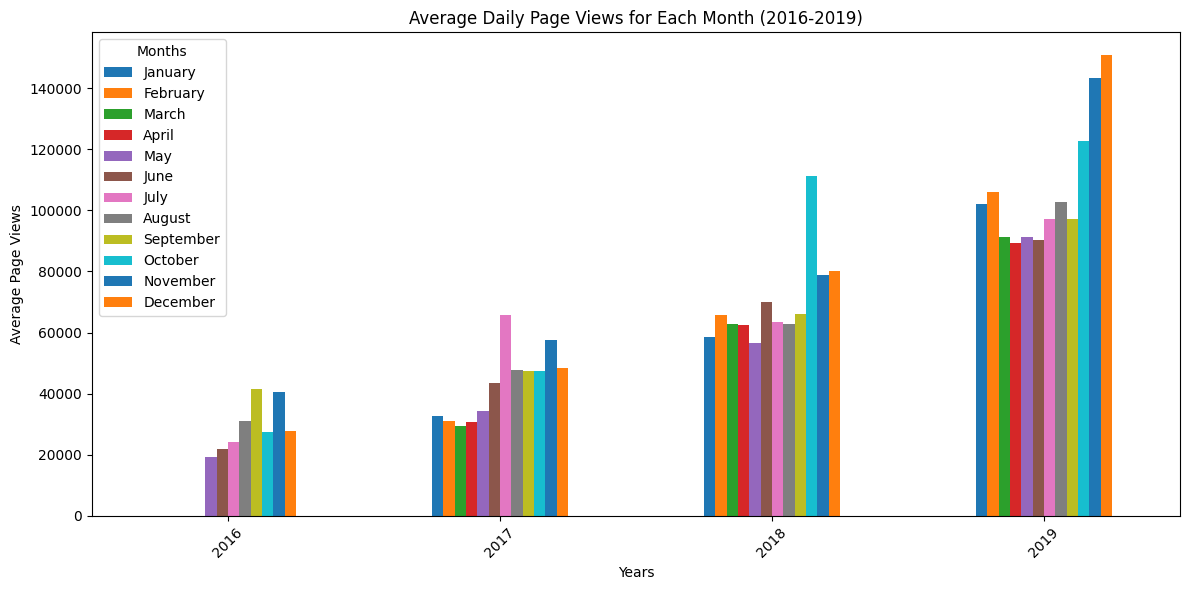

In [51]:

    # Create a new column 'Year' based on the year of the index
    cleaned_df['Year'] = cleaned_df.index.year

    # Create a new column 'Month' based on the month of the index
    cleaned_df['Month'] = cleaned_df.index.month_name()

    # Create a pivot table to calculate the average page views for each month in each year
    avg_page_views = cleaned_df.pivot_table(values='value', index='Year', columns='Month', aggfunc='mean', fill_value=0)

    # Define the month order for proper sorting
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]

    # Sort the columns of the pivot table based on the defined month order
    avg_page_views = avg_page_views.reindex(columns=month_order)

    # Create the bar plot
    ax = avg_page_views.plot(kind='bar', figsize=(12, 6))
    
    # Set labels and title
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.set_title("Average Daily Page Views for Each Month (2016-2019)")
    
    # Set legend title and location
    ax.legend(title="Months", loc='upper left')
    
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

### Box Plot

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

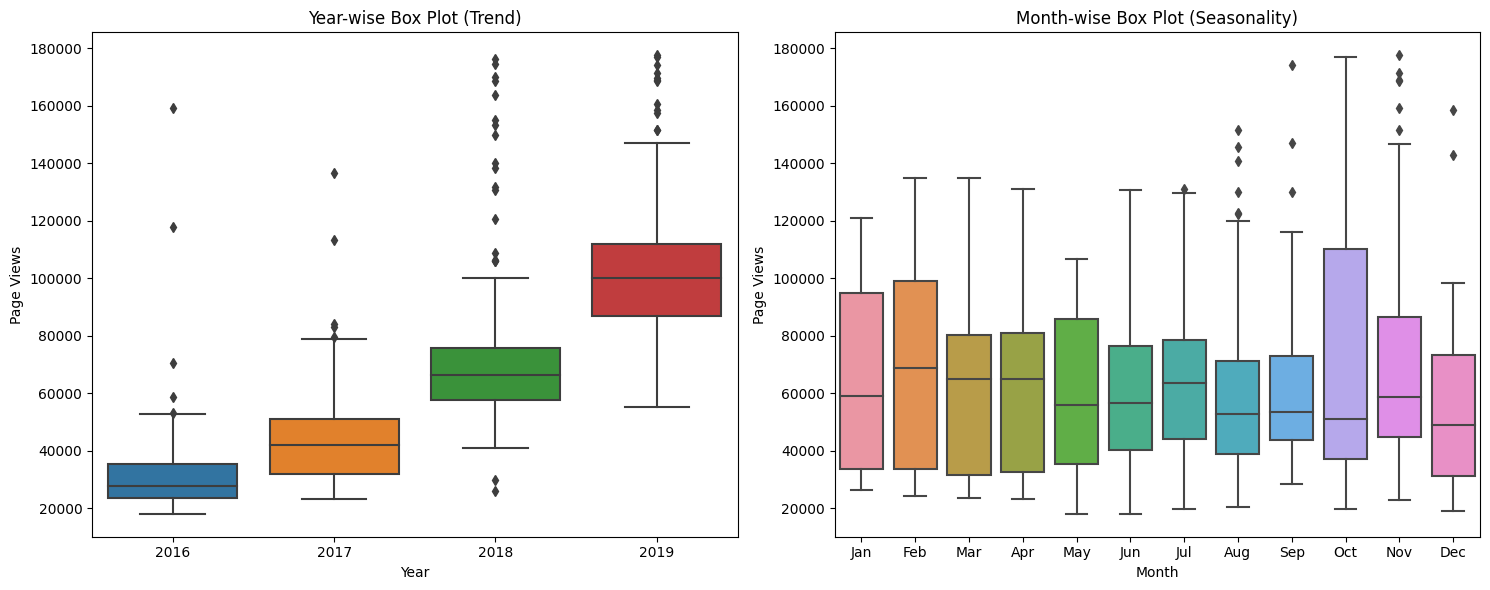

In [53]:
    # Prepare the data (assuming your cleaned DataFrame is named 'df')
    df_box = cleaned_df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Set up the matplotlib figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Draw the first box plot (Year-wise)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Draw the second box plot (Month-wise)
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=[
                'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()